In [6]:
from collections import OrderedDict
import pickle
import numpy as np
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.image as mpimg
import commonFunctions as cf

In [7]:
filters=open('filters.txt','r').readline().strip().split('|')
file="pipeFormat.csv"
f=open(file,"r")
headers=f.readline().strip().split('|')
f.close()

def reWriteTicks(ticks):
    for i in range(len(ticks)):
        tick = ticks[i].split('_')
        if len(tick)==2:
            supportType = tick[0]
            if supportType == 'ds':
                ticks[i] = tick[1].capitalize()+' ({})'.format('Df')
            elif supportType =='s':
                ticks[i] = tick[1].capitalize()+' ({})'.format('A')
        elif ticks[i]=='domsup':
            ticks[i]='Domestic'
    return ticks

In [8]:
organizationInfo=pickle.load(open('pickles/organizationInfo.pickle','rb'))
filters, headers = cf.get_filters_headers()

year1=pickle.load(open('pickles/year1.pickle','rb'))
dead=pickle.load(open('pickles/dead.pickle','rb'))
alive=pickle.load(open('pickles/alive.pickle','rb'))
yearLength=pickle.load(open('pickles/yearLength.pickle','rb'))

In [31]:
label=['All','Dead','Alive','']
cf.dumpPickle('1_years',cf.loadPickle('year1'))
cf.dumpPickle('23_years',cf.loadPickle('year23'))
cf.dumpPickle('All',cf.loadPickle('dead'))
cf.dumpPickle('2_years',[i for i in yearLength if yearLength[i]<=2])

In [38]:
def getCorrelation(tofilter):  
    temp={}
    for filterby in filters:
        index=filters.index(filterby)
        x,y=[],[]
        for nagcode in organizationInfo:
            if nagcode in tofilter:
                x.append(organizationInfo[nagcode][index])
                y.append(yearLength[nagcode])
        #print(filterby,np.corrcoef(x,y)[1][0])
        temp[filterby]=np.corrcoef(x,y)[1][0]
    temp=sorted(temp.items(),key=operator.itemgetter(1))
    return temp

def colorBars(dataWrap,yticks):
    labels=cf.loadPickle('groupLabels')
    
    plt.close()
    plt.figure(figsize = (7,10), dpi = 300)
    gs = gridspec.GridSpec(len(labels),2)   
    for label in labels:
        index=labels.index(label)
        ax=plt.subplot(gs[index,0:2])
        cbar = False if index!=len(labels)-1 else True
        cbar=False
        #cmap = plt.get_cmap('binary')
        sns.heatmap([[i[1] for i in dataWrap[label]]],annot=True,cbar=cbar,cbar_kws={"orientation": "horizontal"},vmin=-1,vmax=0)  
        plt.xticks(list(map(lambda x:x+0.5,range(5))),reWriteTicks([i[0] for i in dataWrap[label]]))
        plt.ylim(0,1)
        plt.yticks([0.5],[yticks[index]],rotation=0)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')        
#     ax=plt.subplot(gs[index+1,0:2])
#     ax=sns.heatmap([[0 for i in range(5)]],cbar_kws={"orientation": "horizontal"},vmin=-1,vmax=0)
#     cax = plt.gcf().axes[-1]
#     cax.tick_params(labelsize=6)
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     plt.xticks([])
#     plt.yticks([])

    
    plt.tight_layout()
    plt.savefig('paperImages/Figure-6.png',bbox_inches='tight')
    plt.show()

c:\program files (x86)\python36-32\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\program files (x86)\python36-32\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


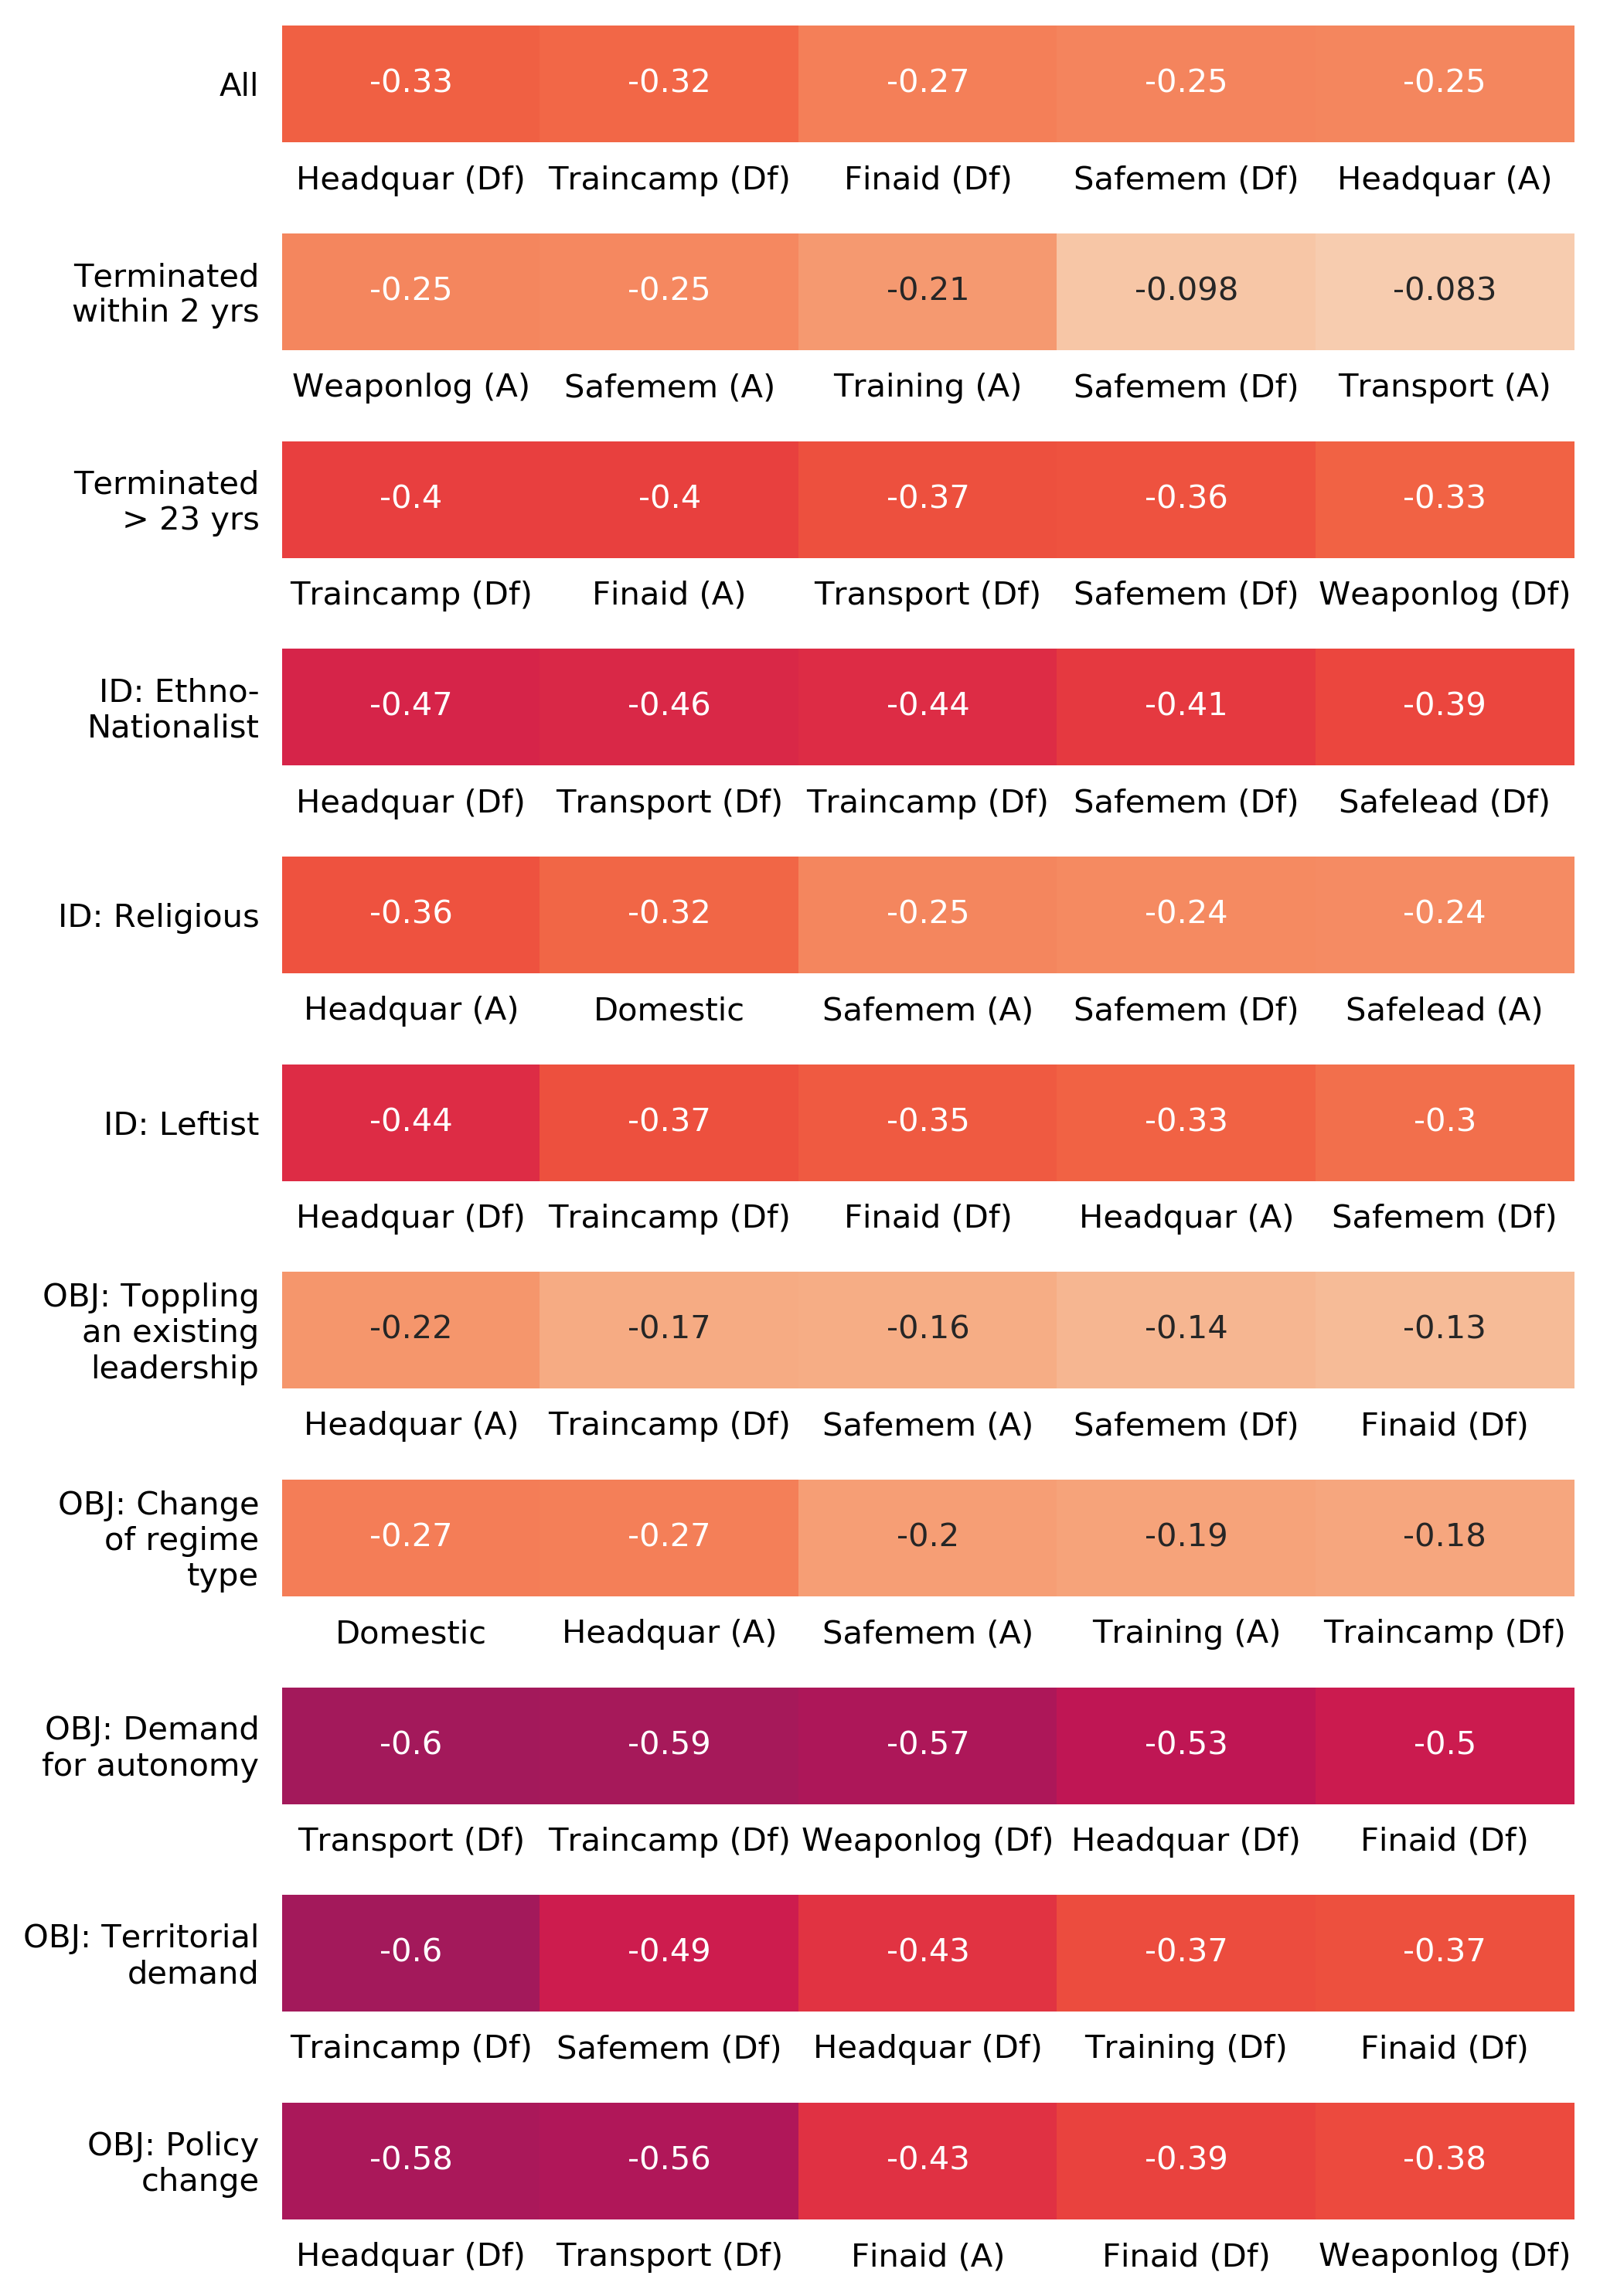

In [39]:
dataWrap={}
wrap={}
for label in cf.loadPickle('groupLabels'):
    temp=getCorrelation(cf.loadPickle(label))[0:5]
    dataWrap[label]=temp
    wrap[label]=[i[0] for i in temp]

yticks=['All','Terminated\nwithin 2 yrs','Terminated\n> 23 yrs','ID: Ethno-\nNationalist',
       'ID: Religious','ID: Leftist','OBJ: Toppling\nan existing\nleadership',
        'OBJ: Change\nof regime\ntype','OBJ: Demand\nfor autonomy',
        'OBJ: Territorial\ndemand','OBJ: Policy\nchange'
       ]
colorBars(dataWrap,yticks) 

In [263]:
dumpPickle('corrWrap',wrap)

In [23]:
len(cf.loadPickle('archive/Religious'))

65

In [30]:
groupLabels = ['All',
 '2_years',
 '23_years',
 'Ethno-Nationalist',
 'Religious',
 'Leftist',
 'Toppling',
 'Change',
 'Autonomy',
 'Demand',
 'Policy']

cf.dumpPickle('groupLabels',groupLabels)